In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline 
np.random.seed = 1
N = 1000
fs = 500
w = np.arange(1,N+1) * 2 * np.pi/fs
t = np.arange(1,N+1)/fs
x = 0.75 * np.sin(w*5)
y = signal.sawtooth(w*7, 0.5)
d1 = 0.5*y   + 0.5*x   + 0.1*np.random.rand(1,N)
d2 = 0.2*y   + 0.75*x  + 0.15*np.random.rand(1,N)
d3 = 0.7*y   + 0.25*x  + 0.1*np.random.rand(1,N)
d4 = -0.5*y  + 0.4*x   + 0.2*np.random.rand(1,N)
d5 = 0.6*np.random.rand(1,N)


d1 = d1 - d1.mean()
d2 = d2 - d2.mean()
d3 = d3 - d3.mean()
d4 = d4 - d4.mean()
d5 = d5 - d5.mean()




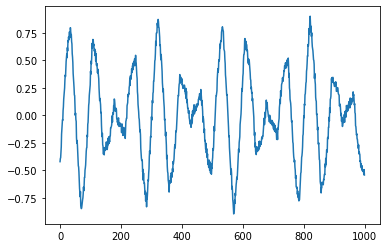

In [3]:
plt.plot(d1.transpose())

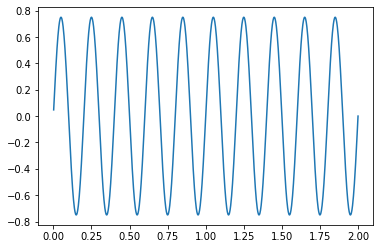

In [4]:
plt.plot(t, x)

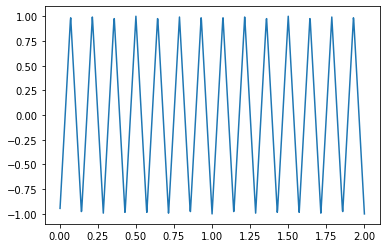

In [5]:
plt.plot(t, y)

In [6]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([d1[0], d2[0], d3[0], d4[0], d5[0]])
X

array([[-0.42122458, -0.39354848, -0.38437414, ..., -0.5381778 ,
        -0.49318915, -0.54248294],
       [-0.11016445, -0.0843507 , -0.00305971, ..., -0.19989512,
        -0.15732622, -0.17209454],
       [-0.61591781, -0.61661307, -0.55751089, ..., -0.67733482,
        -0.65833868, -0.69000068],
       [ 0.58865128,  0.56557867,  0.44225231, ...,  0.34631624,
         0.5385989 ,  0.58885229],
       [ 0.23379806,  0.15414356,  0.05417609, ..., -0.02401656,
         0.28747753,  0.06958541]])

In [7]:
U,S,V = np.linalg.svd(X)
S

array([20.95115984, 14.20984499,  5.55939751,  1.44333132,  0.96248229])

In [8]:
eigen = S**2
eigen

array([438.95109849, 201.91969461,  30.90690065,   2.08320529,
         0.92637215])

In [9]:
eigen

array([438.95109849, 201.91969461,  30.90690065,   2.08320529,
         0.92637215])

In [10]:
for i in range(5):
    V[:,i] = V[:,i] * np.sqrt(eigen[i])



In [11]:
eigen = eigen/N
eigen = eigen/sum(eigen)

In [12]:
eigen

array([0.65050293, 0.29923459, 0.04580244, 0.0030872 , 0.00137284])

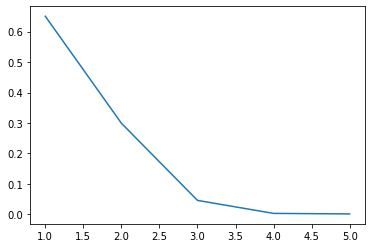

In [13]:
plt.plot(range(1,6), eigen)

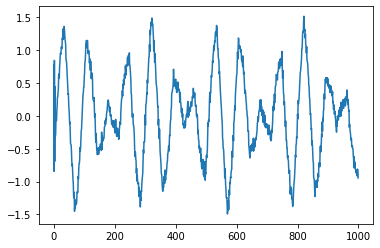

In [14]:

plt.plot(V[:,0])
plt.show()

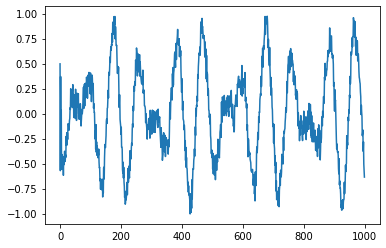

In [15]:
plt.plot(V[:,1])
plt.show()

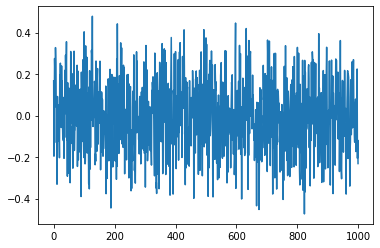

In [16]:
plt.plot(V[:,2])
plt.show()

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'Sepal length')

Text(0, 0.5, 'Sepal width')

(3.8, 8.4)

(1.5, 4.9)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

Text(0.5, 0.92, 'First three PCA directions')

Text(0.5, 0, '1st eigenvector')

[]

Text(0.5, 0, '2nd eigenvector')

[]

Text(0.5, 0, '3rd eigenvector')

[]

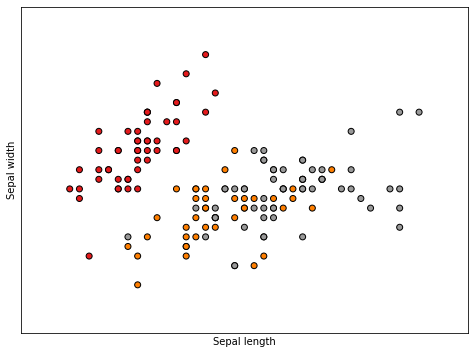

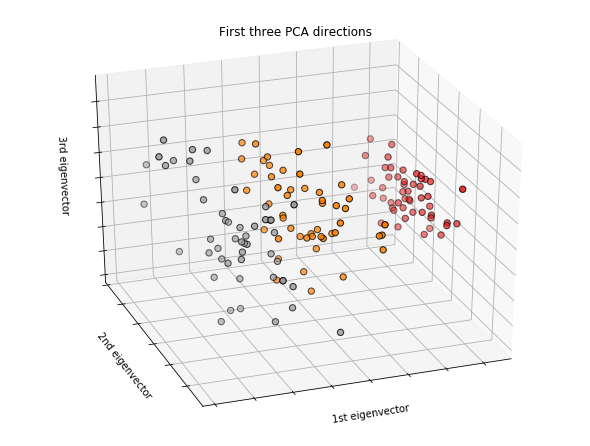

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [18]:
iris = datasets.load_iris()
X = iris.data[:50,:] 

In [19]:
X2 = X +100*np.random.rand(50,4)

In [20]:
X_combined = np.zeros((50,8))

In [21]:
X_combined[:,0:4] = X
X_combined[:,4:] = X2

In [22]:
X_combined

array([[5.10000000e+00, 3.50000000e+00, 1.40000000e+00, 2.00000000e-01,
        9.02146358e+01, 6.02765449e+01, 4.03891034e+01, 9.27992701e+01],
       [4.90000000e+00, 3.00000000e+00, 1.40000000e+00, 2.00000000e-01,
        4.07264961e+01, 2.64635937e+01, 6.18170981e+01, 2.16012161e+01],
       [4.70000000e+00, 3.20000000e+00, 1.30000000e+00, 2.00000000e-01,
        7.24236596e+01, 5.49455085e+01, 4.26223010e+01, 5.05248472e+01],
       [4.60000000e+00, 3.10000000e+00, 1.50000000e+00, 2.00000000e-01,
        9.01407145e+01, 4.41547182e+01, 9.74167116e+00, 9.85086138e+01],
       [5.00000000e+00, 3.60000000e+00, 1.40000000e+00, 2.00000000e-01,
        3.22488641e+01, 2.42161658e+01, 9.91492365e+01, 3.61271293e+01],
       [5.40000000e+00, 3.90000000e+00, 1.70000000e+00, 4.00000000e-01,
        8.12957796e+01, 9.98398321e+01, 7.72497603e+01, 5.30757453e+01],
       [4.60000000e+00, 3.40000000e+00, 1.40000000e+00, 3.00000000e-01,
        9.70377685e+01, 9.41512918e+01, 7.61842241e+01, 3.

In [23]:
X_combined.mean(axis=0)

array([ 5.006     ,  3.428     ,  1.462     ,  0.246     , 58.83756152,
       53.76392362, 55.25233635, 50.20255504])

In [24]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_combined)
X_scaled  

array([[ 2.69381893e-01,  1.91869743e-01, -3.60635820e-01,
        -4.40923824e-01,  1.07493101e+00,  2.32002610e-01,
        -4.96906326e-01,  1.45580466e+00],
       [-3.03771071e-01, -1.14055903e+00, -3.60635820e-01,
        -4.40923824e-01, -6.20457652e-01, -9.72534333e-01,
         2.19472551e-01, -9.77492340e-01],
       [-8.76924035e-01, -6.07587521e-01, -9.42306497e-01,
        -4.40923824e-01,  4.65439127e-01,  4.20922333e-02,
        -4.22246256e-01,  1.10148040e-02],
       [-1.16350052e+00, -8.74073275e-01,  2.21034857e-01,
        -4.40923824e-01,  1.07239858e+00, -3.42313891e-01,
        -1.52150864e+00,  1.65092979e+00],
       [-1.71945889e-02,  4.58355498e-01, -3.60635820e-01,
        -4.40923824e-01, -9.10888472e-01, -1.05259566e+00,
         1.46755739e+00, -4.81048138e-01],
       [ 1.12911134e+00,  1.25781276e+00,  1.38437621e+00,
         1.47613628e+00,  7.69384513e-01,  1.64138686e+00,
         7.35415986e-01,  9.81954529e-02],
       [-1.16350052e+00, -7.461601

In [25]:
X_scaled.mean(axis=0)

array([ 1.87003191e-15, -2.20823360e-15, -1.17128529e-15,  9.17044218e-16,
       -7.17204074e-16,  2.22044605e-18, -6.66133815e-17, -4.64073224e-16])

In [26]:
U,S,V = np.linalg.svd(X_scaled)
S

array([10.26695172,  8.45683274,  7.86592439,  7.32396436,  6.37739785,
        5.69358697,  4.76342461,  3.43221679])

In [27]:
eigen = S**2
eigen

array([105.41029755,  71.51801998,  61.87276651,  53.64045391,
        40.67120335,  32.41693257,  22.69021404,  11.78011208])

In [28]:
eigen = eigen/50
eigen = eigen/sum(eigen)

In [65]:
eigen = np.round(eigen*100)/100
print(eign)

NameError: name 'eign' is not defined

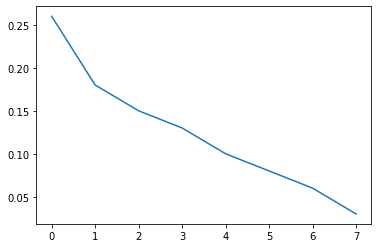

In [30]:
plt.plot(eigen)

In [31]:
X_reduced = PCA(n_components=3).fit_transform(X_scaled)

<IPython.core.display.Javascript object>


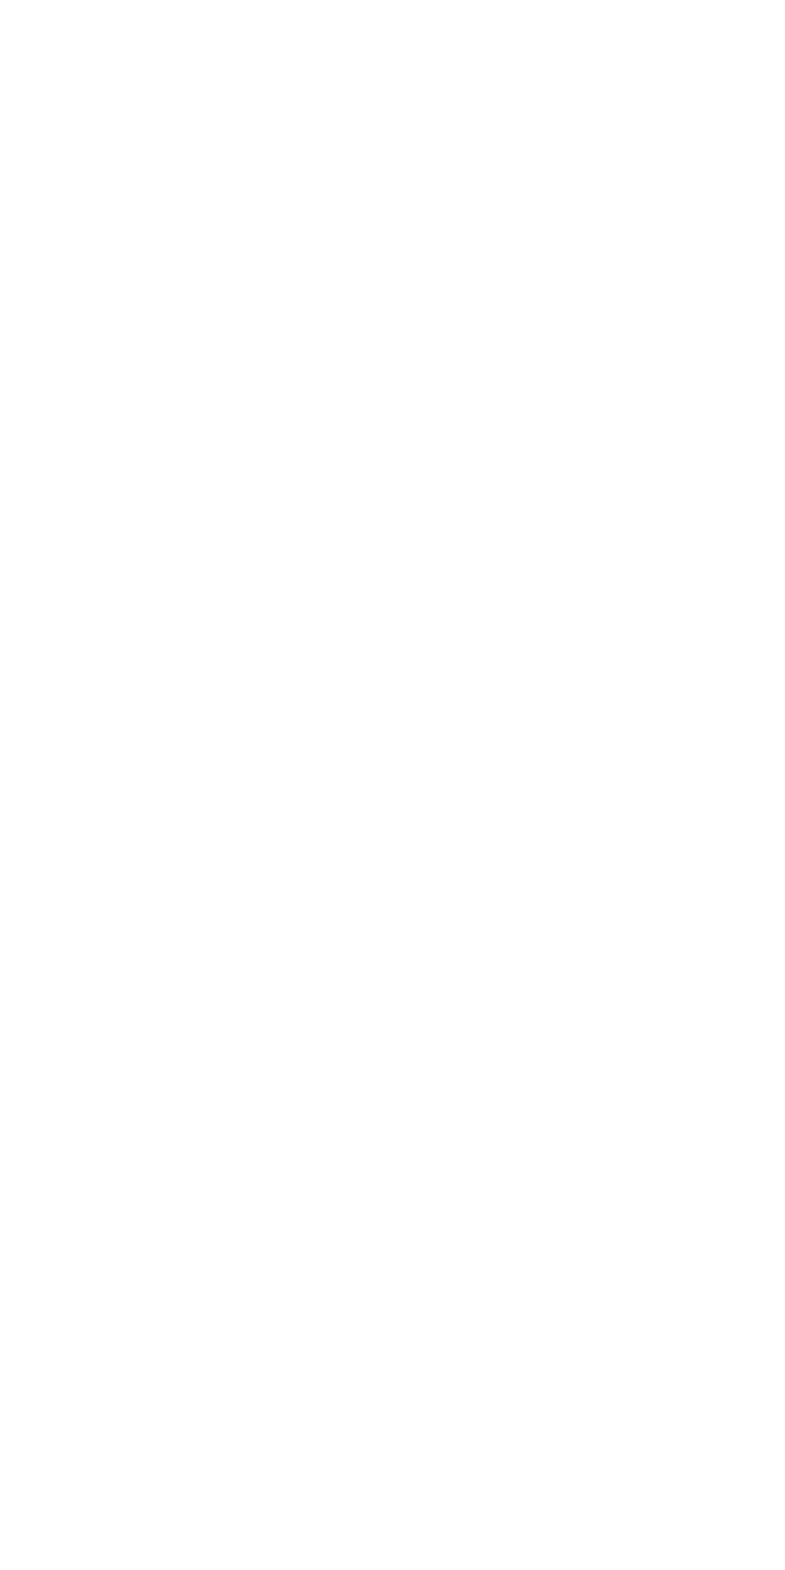

<IPython.core.display.Javascript object>


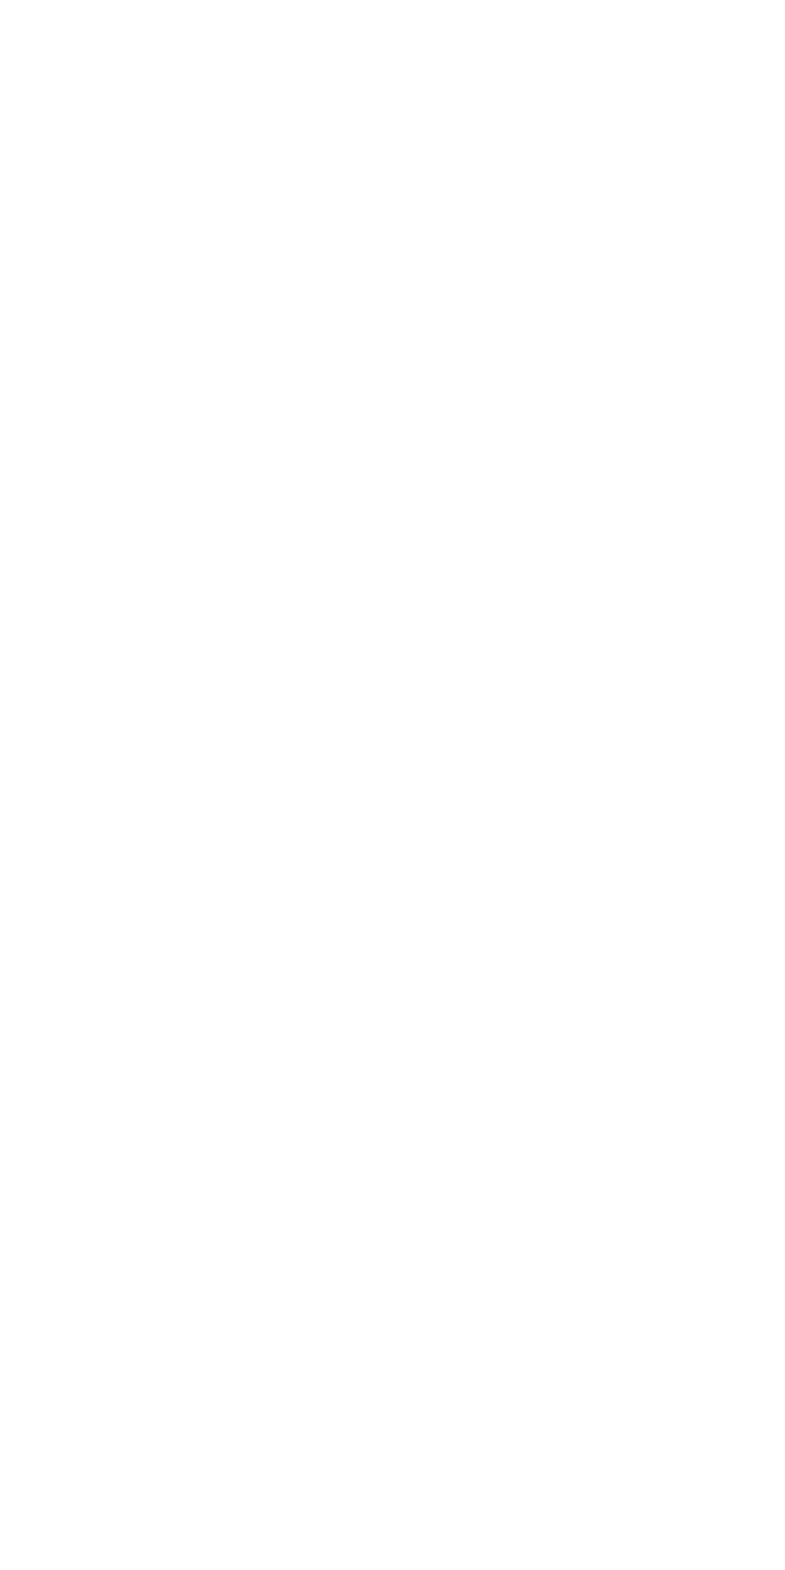

Text(0.5, 1.0, 'Observations (mixed signal)')

Text(0.5, 1.0, 'True Sources')

Text(0.5, 1.0, 'ICA recovered signals')

<IPython.core.display.Javascript object>


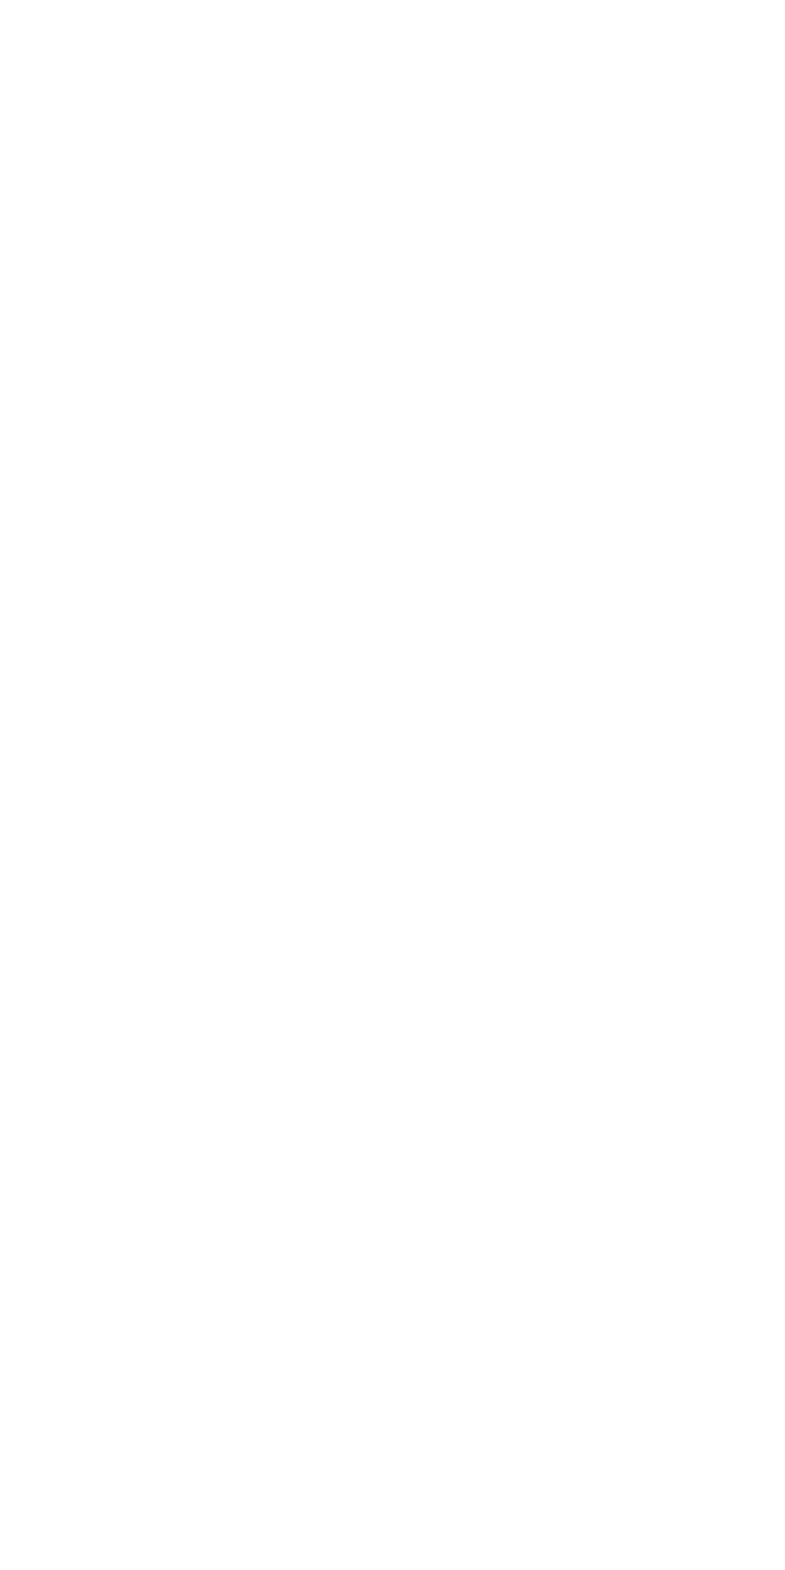

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib notebook

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed = 0
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# #############################################################################
# Plot results

plt.figure(figsize=(10,20))

models = [X, S, S_]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',]
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

# plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.tight_layout()
plt.show()
plt.show()

<IPython.core.display.Javascript object>


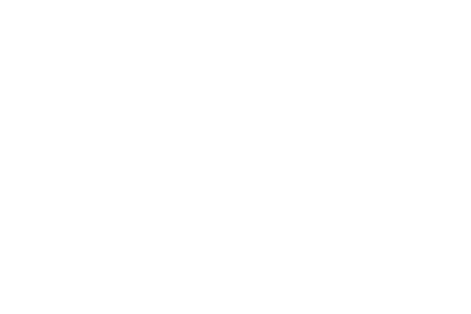

Text(0.5, 1.0, 'Three blobs')

<IPython.core.display.Javascript object>


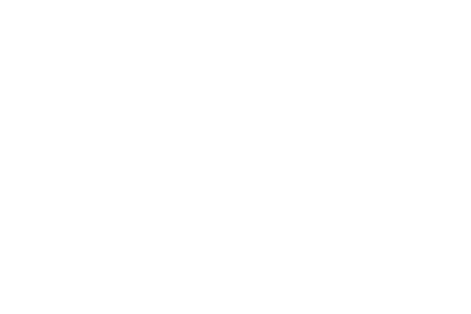

In [33]:
# https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
# https://blog.floydhub.com/introduction-to-k-means-clustering-in-python-with-scikit-learn/
from sklearn.datasets import make_blobs
plt.title("Three blobs", fontsize='small')
X1, Y1 = make_blobs(n_features=2, centers=3, random_state=10)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

<IPython.core.display.Javascript object>


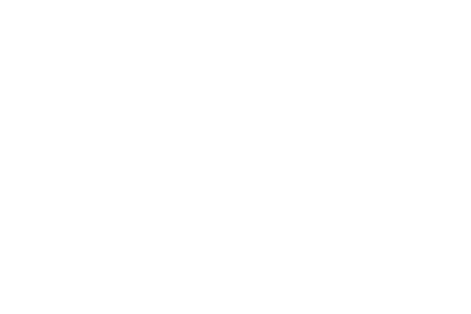

Text(0.5, 1.0, 'Data points and cluster centroids')

<IPython.core.display.Javascript object>


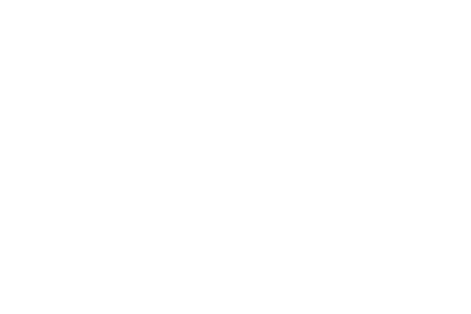

In [34]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
    
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X1)
# Get the cluster centroids

# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

In [35]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [36]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html
# http://www.cse.psu.edu/~rtc12/CSE486/lecture15.pdf
# https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

In [37]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
Y = data.target

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [38]:
print(data.DESCR)
data.target_names

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

array(['malignant', 'benign'], dtype='<U9')

In [39]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
accuracy


C:\Users\mkhaw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

0.958041958041958

In [43]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[50,  3],
       [ 3, 87]], dtype=int64)

In [44]:
Y_pred
Y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [45]:

results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.97      0.97      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [46]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

0.951048951048951

array([[47,  6],
       [ 1, 89]], dtype=int64)

In [47]:
print(accuracy)

0.951048951048951


In [48]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        53
           1       0.94      0.99      0.96        90

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



In [49]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

0.972027972027972

array([[51,  2],
       [ 2, 88]], dtype=int64)

In [50]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.98      0.98      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [51]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

0.965034965034965

array([[50,  3],
       [ 2, 88]], dtype=int64)

In [52]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.97      0.98      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



In [53]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

GaussianNB(priors=None, var_smoothing=1e-09)

0.916083916083916

array([[47,  6],
       [ 6, 84]], dtype=int64)

In [54]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        53
           1       0.93      0.93      0.93        90

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



In [55]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

0.958041958041958

array([[51,  2],
       [ 4, 86]], dtype=int64)

In [56]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.98      0.96      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [57]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

from sklearn.metrics import fbeta_score
output = fbeta_score(Y_test, Y_pred, average='macro', beta=0.5)
output

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

0.972027972027972

array([[52,  1],
       [ 3, 87]], dtype=int64)

0.9682719241542771

In [58]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        53
           1       0.99      0.97      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [59]:
# https://datascience-enthusiast.com/Python/ROC_Precision-Recall.html

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

C:\Users\mkhaw\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

0.9649122807017544

array([[45,  2],
       [ 2, 65]], dtype=int64)

In [61]:
from sklearn.metrics import classification_report
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [62]:
from sklearn.datasets import make_classification 
X, Y = make_classification(n_samples=100, n_features=4, weights = [0.90, 0.1], random_state=0)

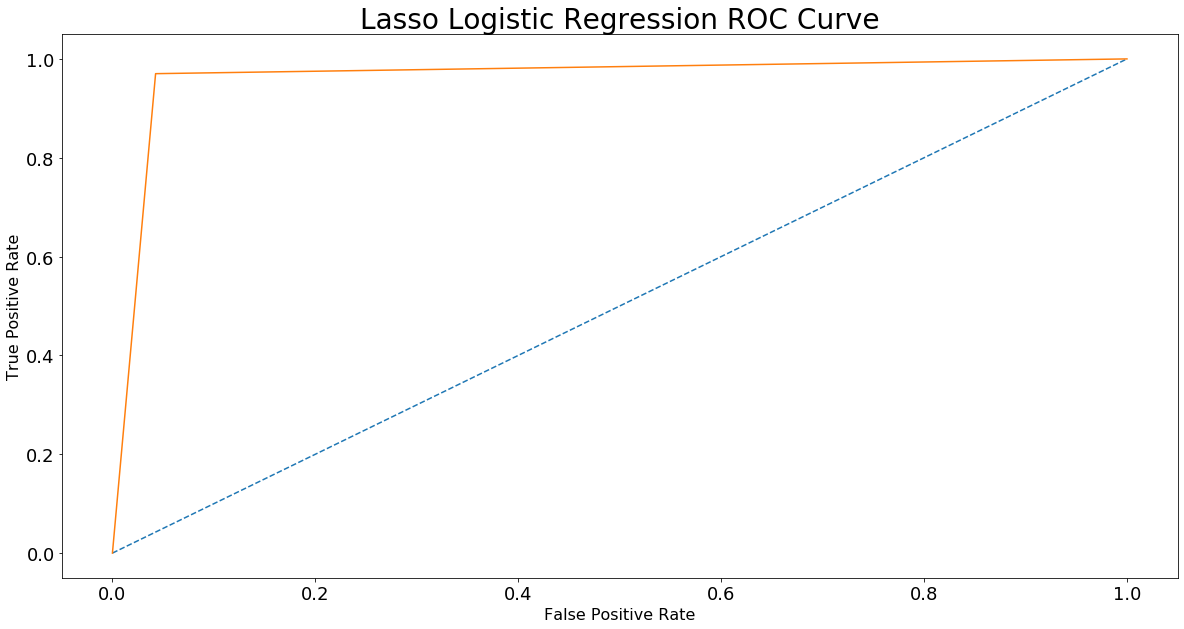

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
plt.figure(figsize = (20,10))
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.title('Lasso Logistic Regression ROC Curve', fontsize = 28)
plt.show();

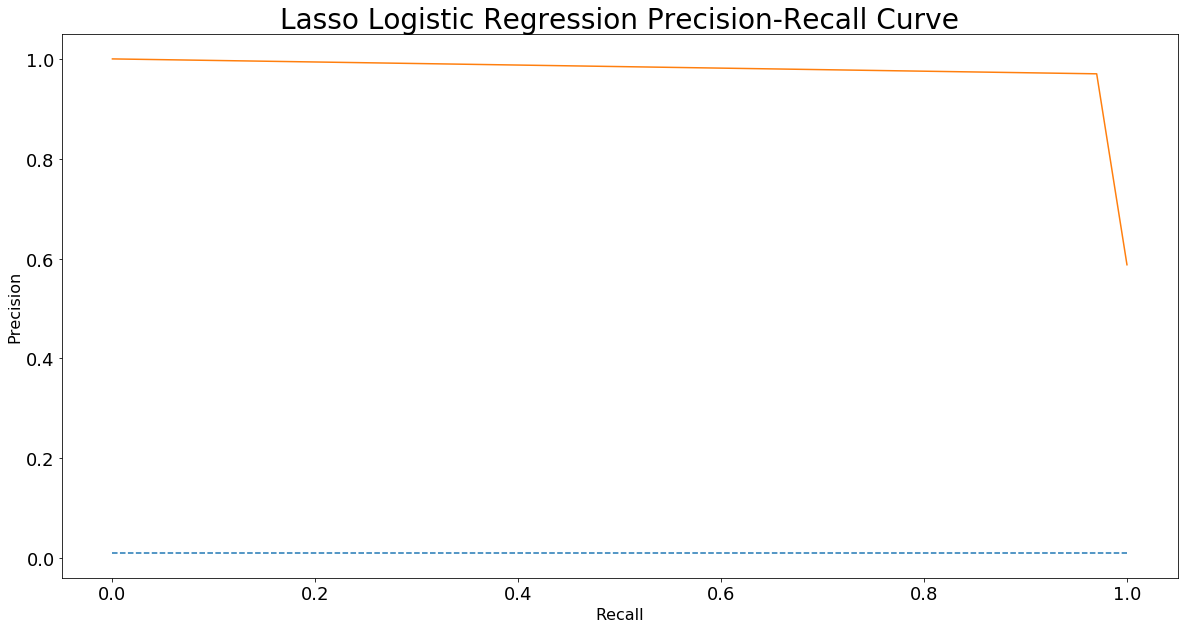

In [64]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred)
plt.figure(figsize = (20,10))
plt.plot([0, 1], [0.01/0.98, 0.01/0.98], linestyle = '--')
plt.plot(recall, precision)
plt.xlabel('Recall', fontsize = 16)
plt.ylabel('Precision', fontsize = 16)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.title('Lasso Logistic Regression Precision-Recall Curve', fontsize = 28)
plt.show();